# Imports


In [1]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt 
import mplfinance as mpf

# Function Save data to CVS


In [2]:
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime( eyear, emonth, eday)

    df = web.DataReader(ticker, 'yahoo', start, end)

    df.to_csv(ticker + ".csv")
    return df

# Functions that returns a dataframe from a CSV

In [3]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(ticker + ".csv")
    except FileNotFoundError:
        print('File does not exist')
    else:
        return df

# Add daily return to dataframe

In [4]:
# Formula END / Beggining - 1
# The daily return measures the dollar change in a stock’s price as a percentage of the previous day’s closing price. 
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df.to_csv(ticker + ".csv")
    return df

# Return total return over time

In [5]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    daily_return = df.loc[mask]['daily_return'].mean()
    df2 = df.loc[mask]
    days = df2.shape[0]
    return (days * daily_return)

# Matplotlib Finance

In [6]:
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    try:
        df = pd.read_csv(ticker + ".csv")
    except FileNotFoundError:
        print('File does not exist')
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        ### PLOTS: Candle, line, ohlc
        mpf.plot(df_sub, type='candle')
        mpf.plot(df_sub, type='line')
        mpf.plot(df_sub, type='ohlc', mav=4)

        #STYLE
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size':8})
        fig = mpf.figure(figsize=(12,8), style=s)
        ax = fig.add_subplot(2,1,2)
        av = fig.add_subplot(2,1,2, sharex=ax)
        mpf.plot(df_sub, type=chart_type, mav= (3,5,7), ax=ax,volume=av, show_nontrading=True)



# Functions TESTS

Total return:  0.04777517423943911


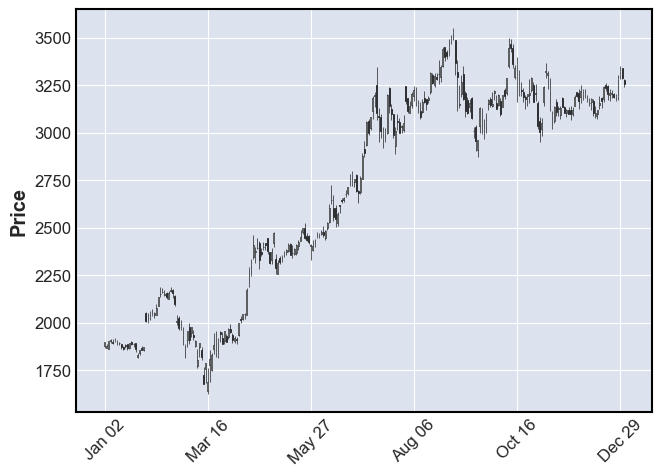

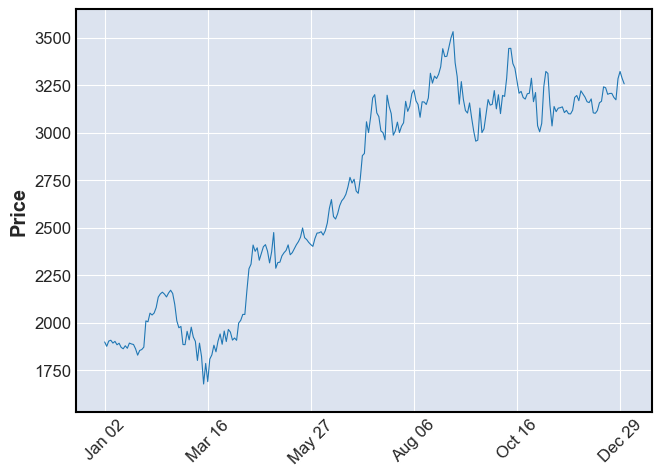

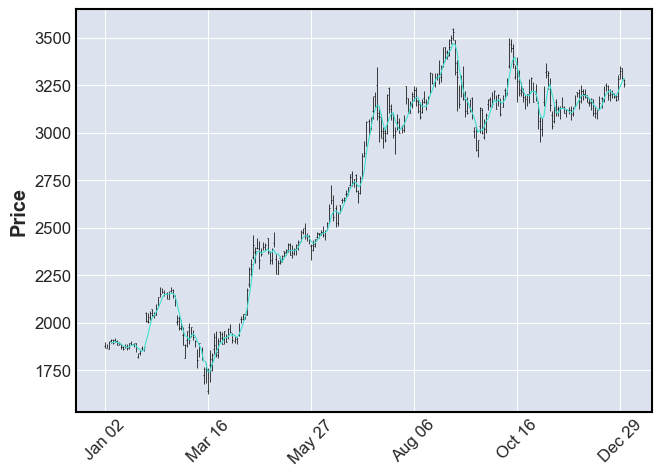

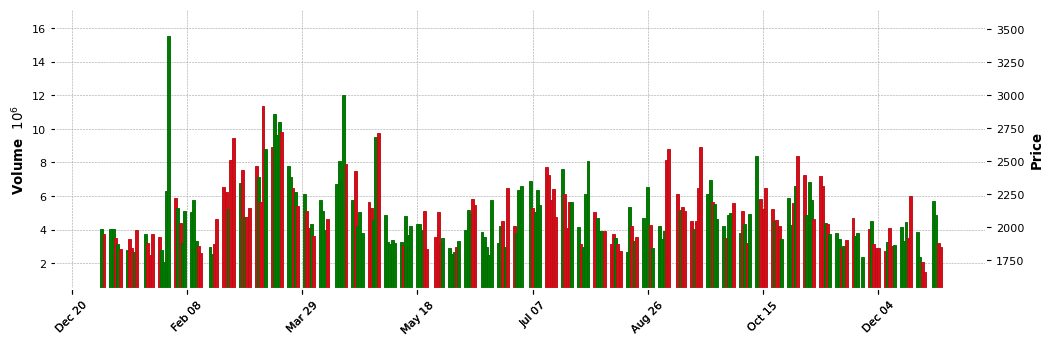

In [12]:
# APPLE
save_to_csv_from_yahoo('AAPL', 2020, 1, 1, 2021, 1, 1)
#save_to_csv_from_yahoo('BTC-USD', 2019, 1, 1, 2021, 1, 1)
save_to_csv_from_yahoo('AMZN', 2020, 1, 1, 2021, 1, 1)
save_to_csv_from_yahoo('NFLX', 2020, 1, 1, 2022, 1, 14)
save_to_csv_from_yahoo('FB', 2020, 1, 1, 2022, 1, 14)

AAPL = get_df_from_csv('AAPL')
#BTC = get_df_from_csv('BTC-USD')
AMZN = get_df_from_csv('AMZN')
NFLX = get_df_from_csv('NFLX')
FB = get_df_from_csv('FB')
add_daily_return_to_df(AAPL, 'AAPL')
add_daily_return_to_df(AMZN, 'AMZN')
add_daily_return_to_df(FB, 'FB')
AAPL
#BTC
total_return = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print('Total return: ', total_return)


mplfinance_plot('AMZN', 'ohlc',2020, 1, 1, 2021, 1, 1 )

